In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from joblib import load
X_train, X_test, Y_train, Y_test = load("../../preprocessing/classification_data.joblib")
X_train.head()

,the numeric,and numeric,a numeric,of numeric,to numeric,is numeric,I numeric,in numeric,that numeric,it numeric,...,ompa numeric,ra_ numeric,le_to numeric,bra numeric,uch_a numeric,ave_a numeric,n_in_ numeric,ied_ numeric,nd_b numeric,rso numeric
0,0.12500,0.190476,0.052632,0.04,0.095238,0.133333,0.047619,0.066667,0.000000,0.055556,...,0.00,0.0,0.00,0.000,0.0,0.0,0.0,0.00,0.0,0.0
1,0.71875,0.190476,0.473684,0.44,0.333333,0.333333,0.000000,0.333333,0.500000,0.166667,...,0.00,0.0,0.00,0.000,0.0,0.0,0.0,0.00,0.0,0.0
2,0.12500,0.571429,0.157895,0.36,0.142857,0.333333,0.000000,0.266667,0.083333,0.000000,...,0.00,0.0,0.00,0.000,0.0,0.0,0.0,0.00,0.0,0.0
3,0.21875,0.285714,0.368421,0.24,0.380952,0.066667,0.285714,0.066667,0.000000,0.166667,...,0.25,0.0,0.00,0.125,0.0,0.0,0.0,0.25,0.0,0.0
4,0.50000,0.476190,0.947368,0.40,0.238095,0.466667,0.190476,0.266667,0.166667,0.388889,...,0.00,0.0,0.25,0.125,0.0,0.0,0.0,0.00,0.0,0.0


In [2]:
from sklearn.neighbors import KNeighborsClassifier
%run ../../functions/Model.ipynb

In [3]:
knn = KNeighborsClassifier()
knn = build_model(knn, X_train, X_test, Y_train, Y_test)

Train data:
Confusion matrix: 
 [[ 8  0  0 ...  0  0  0]
 [ 0 12  0 ...  0  0  0]
 [ 0  0 20 ...  0  0  0]
 ...
 [ 0  0  2 ... 13  0  0]
 [ 0  1 10 ...  0  1  0]
 [ 0  0  5 ...  0  0  7]]
Accuracy score: 
 0.275
Precision score: 
 [0.57, 0.32, 0.07, 1.0, 0.14, 0.48, 0.82, 1.0, 0.27, 0.06, 1.0, 0.47, 1.0, 1.0, 0.41, 0.75, 1.0, 1.0, 1.0, 1.0, 0.57, 1.0, 0.75, 0.5, 1.0, 1.0, 0.19, 0.24, 1.0, 1.0, 1.0, 1.0, 0.38, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.36, 1.0, 1.0]
Recall score: 
 [0.33, 0.5, 0.83, 0.54, 0.33, 0.88, 0.38, 0.33, 0.46, 0.88, 0.04, 0.29, 0.12, 0.04, 0.29, 0.12, 0.0, 0.17, 0.67, 0.04, 0.33, 0.83, 0.25, 0.29, 0.54, 0.17, 0.33, 0.62, 0.04, 0.0, 0.12, 0.17, 0.25, 0.12, 0.04, 0.08, 0.33, 0.04, 0.08, 0.08, 0.08, 0.0, 0.17, 0.08, 0.42, 0.12, 0.0, 0.54, 0.04, 0.29]
F1 score: 
 [0.42, 0.39, 0.13, 0.7, 0.2, 0.62, 0.51, 0.5, 0.34, 0.11, 0.08, 0.36, 0.22, 0.08, 0.34, 0.21, 0.0, 0.29, 0.8, 0.08, 0.42, 0.91, 0.38, 0.37, 0.7, 0.29, 0.24, 0.35, 0.08, 0.0, 0.2

In [12]:
import math
param_grid = {'n_neighbors': range(3, math.ceil(math.sqrt(X_train.shape[0])), 3),
             'weights': ['uniform', 'distance'],
             'p': [1, 2]}
search = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='accuracy', cv=3)

In [13]:
search.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(3, 35, 3), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [14]:
search.best_params_

{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}

In [15]:
search.best_score_

0.15083333333333335

In [16]:
search = build_model(search, X_train, X_test, Y_train, Y_test)

Train data:
Confusion matrix: 
 [[24  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 24  0]
 [ 0  0  0 ...  0  0 24]]
Accuracy score: 
 1.0
Precision score: 
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Recall score: 
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
F1 score: 
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 

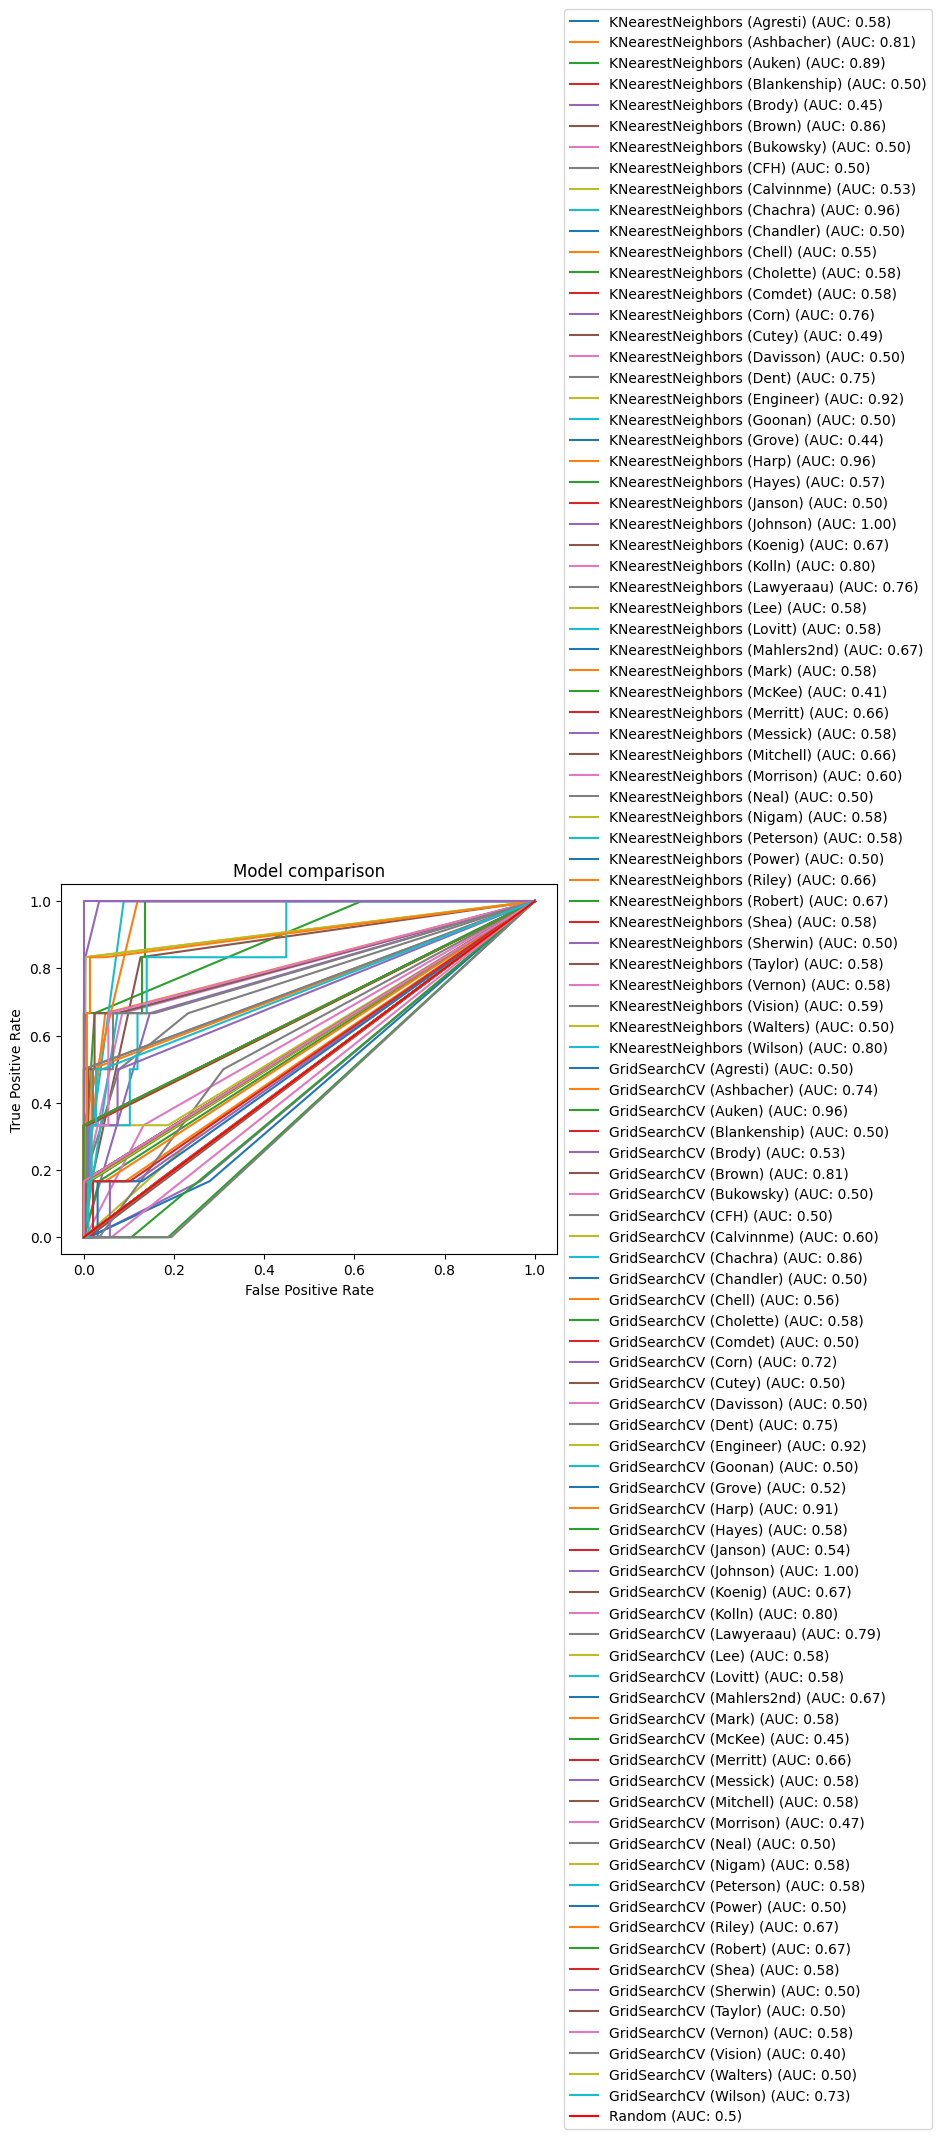

In [17]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import mplcursors

models = [knn, search.best_estimator_]
model_names = ['KNearestNeighbors', 'GridSearchCV']

y_test_bin = label_binarize(Y_test, classes=np.unique(Y_test))
class_names = np.unique(Y_test)

for model, model_name in zip(models, model_names):
    y_pred_prob = model.predict_proba(X_test)
    n_classes = y_pred_prob.shape[1]

    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
        roc_auc = auc(fpr, tpr)
        lab = f"{model_name} ({class_names[i]}) (AUC: {roc_auc:.2f})"
        plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (AUC: 0.5)', color='red')

plt.title("Model comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
mplcursors.cursor(legend)
plt.show()

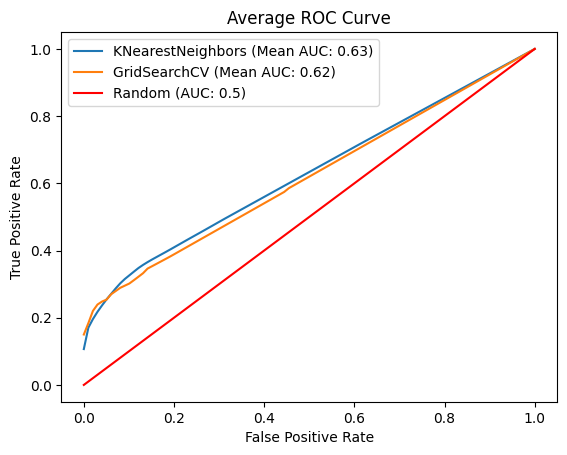

In [18]:
plt.figure()

for model, model_name in zip(models, model_names):
    y_pred_prob = model.predict_proba(X_test)
    n_classes = y_pred_prob.shape[1]

    mean_fpr = np.linspace(0, 1, 100)
    mean_tpr = 0.0

    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
        mean_tpr += np.interp(mean_fpr, fpr, tpr)

    mean_tpr /= n_classes
    mean_auc = auc(mean_fpr, mean_tpr)

    plt.plot(mean_fpr, mean_tpr, label=f"{model_name} (Mean AUC: {mean_auc:.2f})")

plt.plot([0, 1], [0, 1], label='Random (AUC: 0.5)', color='red')

plt.title("Average ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.show()

In [19]:
from joblib import dump
dump(models, 'knn.joblib')

['knn.joblib']